<a href="https://colab.research.google.com/github/mesha4545a/Assigment-2/blob/master/Copy_of_02_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Assignment

#### Dataset Options
1. Dog or horse
    - `https://github.com/gumdropsteve/datasets/raw/master/dog_or_horse.csv`
    - Note: target variable is `target`.
2. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target variable is `Churn`


1. Load in your dataset through its CSV link.

In [1]:
import pandas as pd
df = pd.read_csv('https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


2. Find out some information about the data...

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6338.000000,6338.000000,6338.000000
mean,0.161723,32.283843,64.983236
std,0.368226,24.529521,29.992970
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.450000
50%,0.000000,29.000000,70.500000
75%,0.000000,55.000000,90.000000
max,1.000000,72.000000,118.600000


In [4]:
df.describe(exclude="number")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338,6338
unique,6338,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5921,2
top,1707-HABPF,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3197,3267,4435,5717,3047,2796,3155,2804,2785,3126,2529,2517,3503,3769,2150,11,4650


3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [5]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.020302,0.216512
tenure,0.020302,1.000000,0.253420
MonthlyCharges,0.216512,0.253420,1.000000


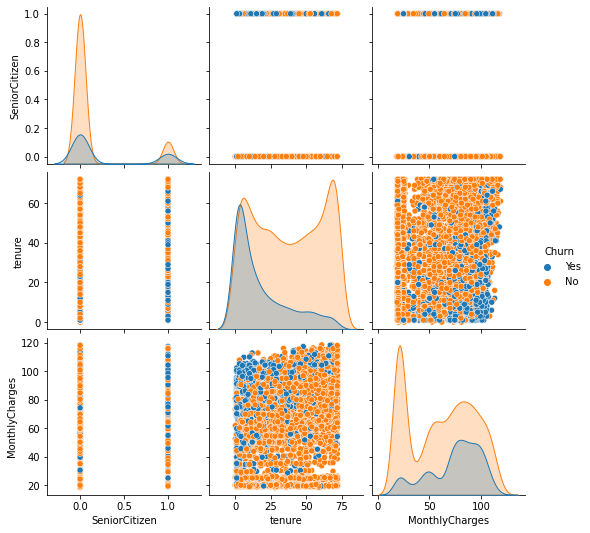

In [6]:
import seaborn as sns
sns.pairplot(df,hue='Churn')

In [7]:
df['Churn'].value_counts()

No     4650
Yes    1688
Name: Churn, dtype: int64

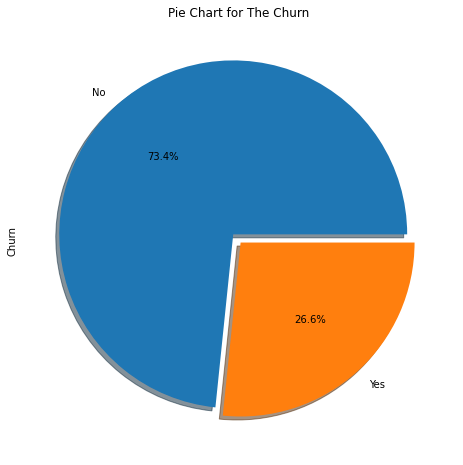

In [8]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot.pie(explode=[0.04650, 0.01688], autopct='%1.1f%%', shadow=True, figsize=(8,8))
plt.title('Pie Chart for The Churn')
plt.show()


4. Split your data into training and testing datasets...

In [9]:
from sklearn.model_selection import train_test_split
X = df[['SeniorCitizen']]#,'tenure','MonthlyCharges']]
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

5. Import, create, and fit a LogisticRegression model with 1 variable

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

In [11]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [12]:
pred = lr.predict(X_test)
pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [13]:
# what do they look like? (show me some of the predictions)
pred[-10:]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

7. Score your model...
- accuracy_score
- confusion_matrix

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test))

0.731335436382755

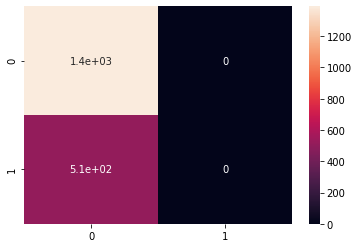

In [15]:
from sklearn.metrics import confusion_matrix

preds = lr.predict(X_test)

sns.heatmap(confusion_matrix(y_test, preds), annot=True)

8. Create, and fit a LogisticRegression model with **more than** 1 variable

In [16]:
X = df[['SeniorCitizen','tenure','MonthlyCharges']]
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [17]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

9. Make predictions on your `X_test` values...

In [18]:
preds = lr.predict(X_test)
preds

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [19]:
# what do they look like? (show me some of the predictions)
preds[-10:]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

10. Score your model...
- accuracy_score
- confusion_matrix

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, lr.predict(X_test))

0.7949526813880127

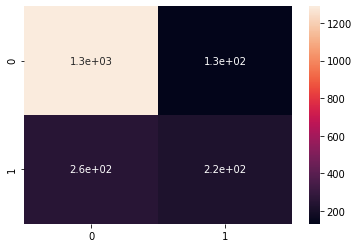

In [21]:
preds = lr.predict(X_test)

sns.heatmap(confusion_matrix(y_test, preds), annot=True)

11. Which model is better? Why?

type your stuff 
the second more accurate 

12. Perform GridSearchCV with the better data

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

param_dict = {'loss': ['log', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'max_iter': [10, 100, 250, 1000, 10000]}

sgdc = SGDClassifier()

grid = GridSearchCV(sgdc, param_dict)

In [23]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'loss': ['log', 'huber', 'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [10, 100, 250, 1000, 10000]},


In [41]:
grid.best_params_

{'loss': 'log', 'max_iter': 1000}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [35]:
sgdc = SGDClassifier(loss='log', max_iter=1000)

In [36]:
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

14. Score the new model... 
- r2_score
- some other metric of your choice

In [42]:
preds = sgdc.predict(X_test)

accuracy_score(y_test, preds)

0.6976866456361724

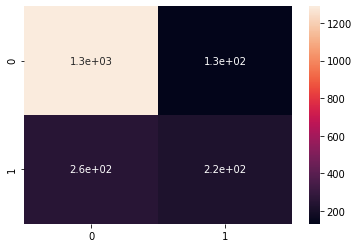

In [43]:
preds = lr.predict(X_test)

sns.heatmap(confusion_matrix(y_test, preds), annot=True)

Did the score change at all? Why?


yes it becomes less accurate
maybe because of the loss attribute



## Bonus
Set up a SGDClassifier, score it, etc... https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Note: you may need more or less code cells, but here's 5.